In [ ]:
#from dataviewer import AutoTabularLoader
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Note, this first section is about removing features that have many missing points. Jump to next section for further analysis of cleaned data to avoid re-running hefty operations. 

In [ ]:
#First, we look at NaNs
filepath="datasets/2024_lar.txt"
nrows=12237197
chunk_iterator=pd.read_csv(filepath, delimiter='|', chunksize=50000)
total_nulls=None
for chunk in chunk_iterator:
    chunk_nulls=chunk.isnull().sum()
    #print(chunk_nulls, type(chunk_nulls))
    if total_nulls is None:
        total_nulls=chunk_nulls
    else:
        total_nulls+=chunk_nulls
total_nulls = total_nulls.sort_values(ascending=False)
total_nulls.to_csv('debug_preview.csv')
non_zero_nulls = total_nulls[total_nulls > 0]
null_percentage=(total_nulls / (nrows)) * 100
non_zero_percentage = null_percentage[non_zero_nulls.index]
print(null_percentage)


NameError: name 'filepath' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(non_zero_percentage))
ax.bar(index, non_zero_percentage, bar_width, label='Percentage Nulls', color='lightblue')
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Null Values (%)')
ax.set_title('Percentage of value that are Null for Columns with Null Values')
ax.set_xticks(index)
ax.set_xticklabels(non_zero_percentage.index, rotation=90)
ax.legend()
plt.tight_layout()
plt.show()

Based on the analysis of missing data across the dataset, it is clear that many columns with a high percentage of null values, such as secondary ethnicity/race features and certain denial reasons, offer limited value and can likely be dropped. These features lie before the column lender_credits. 

On the other hand, columns like property_value, total_loan_costs, and interest_rate, despite having significant missing data, are essential to loan decisions and should not be discarded. These features are key financial indicators and play a crucial role in assessing loan eligibility and risk.

In [ ]:
cols=list(non_zero_percentage.index)
to_discard=cols[0:cols.index('lender_credits')]
output_filepath="datasets/2024_lar_cleaned.csv"
chunksize = 50000
chunk_iterator = pd.read_csv(filepath, delimiter='|', chunksize=chunksize)
first_chunk = True
for chunk in chunk_iterator:
    chunk_cleaned =chunk.drop(columns=to_discard, errors='ignore')  # errors='ignore' prevents error if a column is missing
    chunk_cleaned.to_csv(output_filepath, mode='a', header=first_chunk, index=False)
    first_chunk = False
del chunk
del chunk_cleaned


Having disgarded many columns, we will work directly off this cleaned csv.

In [ ]:
#Examine data types and variable types of cleaned data
output_filepath="datasets/2024_lar_cleaned.csv"
chunk_iterator=pd.read_csv(output_filepath, iterator=True)
chunk_peak=chunk_iterator.get_chunk(10000)
print(chunk_peak.info())
chunk_peak.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 73 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   activity_year                             10000 non-null  int64  
 1   lei                                       10000 non-null  object 
 2   derived_msa_md                            10000 non-null  int64  
 3   state_code                                9663 non-null   object 
 4   county_code                               9660 non-null   float64
 5   census_tract                              9660 non-null   float64
 6   conforming_loan_limit                     9987 non-null   object 
 7   derived_loan_product_type                 10000 non-null  object 
 8   derived_dwelling_category                 10000 non-null  object 
 9   derived_ethnicity                         10000 non-null  object 
 10  derived_race                       

/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/2980616592.py:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  chunk_peak=chunk_iterator.get_chunk(10000)


,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,initially_payable_to_institution,aus_1,denial_reason_1,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2024,ZF85QS7OXKPBG52R7N18,33340,WI,55079.0,5.507900e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,1,10,6158,82.88,102100,61.0,1107,1771,61
1,2024,ZF85QS7OXKPBG52R7N18,20740,WI,55035.0,5.503500e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,6,10,3944,14.60,99400,114.0,1283,1626,33
2,2024,ZF85QS7OXKPBG52R7N18,39540,WI,55101.0,5.510100e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,1,10,6022,7.24,97300,146.0,2137,2566,29
3,2024,ZF85QS7OXKPBG52R7N18,99999,NaN,NaN,NaN,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1,1,10,0,0.00,0,0.0,0,0,0
4,2024,ZF85QS7OXKPBG52R7N18,16984,IL,17043.0,1.704384e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,1,6,10,4787,18.51,109800,151.0,1478,1545,53
5,2024,ZF85QS7OXKPBG52R7N18,41180,IL,17163.0,1.716350e+10,C,Conventional:Subordinate Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,6,10,6756,6.90,103200,121.0,2226,2554,40
6,2024,ZF85QS7OXKPBG52R7N18,36780,WI,55139.0,5.513900e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,1,10,5045,10.55,99100,119.0,1510,1677,36
7,2024,ZF85QS7OXKPBG52R7N18,99999,NaN,NaN,NaN,C,FHA:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,3,3,0,0.00,0,0.0,0,0,0
8,2024,ZF85QS7OXKPBG52R7N18,16984,IL,17031.0,1.703183e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,1,1,10,4046,87.86,109800,51.0,961,1492,53
9,2024,ZF85QS7OXKPBG52R7N18,16984,IL,17031.0,1.703182e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,1,1,10,4666,26.49,109800,75.0,1097,1179,52


In [18]:
def extract_unique_vals_from_all_columns(file_path, chunk_size=100000, dropna=False):
    unique_vals_dict={}    
    data_types={}
    chunk_iter = pd.read_csv(file_path, chunksize=chunk_size)
    for chunk in chunk_iter:
        for column in chunk.columns:
            if column not in unique_vals_dict:
                unique_vals_dict[column] = set()
                data_types[column]=set()
            if dropna:
                unique_vals = chunk[column].dropna().unique().tolist()
            else:
                unique_vals = chunk[column].unique().tolist()
            unique_vals_dict[column].update(unique_vals)
            inferred_types = {type(v).__name__ for v in unique_vals}
            data_types[column].update(inferred_types)
    sorted_dict = {k: v for k, v in sorted(unique_vals_dict.items(), key=lambda item: len(item[1]), reverse=True)}
    return sorted_dict, data_types
unique_values, data_types = extract_unique_vals_from_all_columns(output_filepath)

/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41,43,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf96

This above piece of code counts the number of unique values across the entire dataframe, mainly used for identifying what data should be considered categorical and what should not. Although a data schema is provided, there might be certain data irregularities that are not necessarily reflected in the schema. For example, the loan_amount is stated to be a continuous variable in the schema. For a dataset with 12M rows, one might expect the number of values of loan_amount to be at least on the same order of magnitude. However, there are only 4003 unique loan_amount values which begs exploration.

Furthermore, values that are meant to be numerical clearly contain strings within them. Careful data-cleaning must be done to identify these edge-cases to prevent mis-representation of information.

In [8]:
#Now, we will visualise the data types of each column and ensure it matches with the desired schema. 
for col, val in unique_values.items():
    print(f"Column: '{col}' - Number of unique values: {len(val)} - Data Types: {data_types[col]}")

Column: 'total_loan_costs' - Number of unique values: 2149377 - Data Types: {'float', 'str'}
Column: 'origination_charges' - Number of unique values: 1251267 - Data Types: {'float', 'str'}
Column: 'discount_points' - Number of unique values: 1047426 - Data Types: {'float', 'str'}
Column: 'lender_credits' - Number of unique values: 434735 - Data Types: {'float', 'str'}
Column: 'combined_loan_to_value_ratio' - Number of unique values: 384191 - Data Types: {'float', 'str'}
Column: 'rate_spread' - Number of unique values: 127502 - Data Types: {'float', 'str'}
Column: 'census_tract' - Number of unique values: 88109 - Data Types: {'float', 'int', 'str'}
Column: 'interest_rate' - Number of unique values: 14681 - Data Types: {'float', 'str'}
Column: 'tract_minority_population_percent' - Number of unique values: 9749 - Data Types: {'float'}
Column: 'income' - Number of unique values: 9390 - Data Types: {'float', 'int'}
Column: 'tract_population' - Number of unique values: 8281 - Data Types: {'i

In [22]:
print(unique_values['state_code'])
print(unique_values['debt_to_income_ratio'])
print(unique_values['co_applicant_age_above_62'])
print(unique_values['conforming_loan_limit'])

{'GA', 'DE', 'MO', 'IL', 'LA', 'CA', 'OK', nan, 'ID', 'GU', 'VT', 'TX', 'MN', 'MI', 'AK', 'MT', 'CT', 'PA', 'FL', 'OR', 'RI', 'OH', 'MD', 'VA', 'HI', 'ND', 'MS', 'ME', 'VI', 'NC', 'NV', 'IA', 'NM', 'AZ', 'WI', 'NH', 'IN', 'KY', 'TN', 'UT', 'AL', 'CO', 'NJ', 'AR', 'PR', 'SD', 'WA', 'KS', 'DC', 'SC', 'NY', 'WV', 'NE', 'WY', 'MA'}
{'20%-<30%', '47', '38.0', nan, '36', '50%-60%', '36.0', '39', '40', '44.0', nan, 36.0, '38', '49', 38.0, '42', 45.0, '>60%', '46', '41', '37.0', '44', '43', '37', '48', '45', 'Exempt', nan, '<20%', '45.0', '41.0', '30%-<36%'}
{'Yes', nan, nan, nan, 'No', nan}
{nan, 'U', 'C', 'NC'}


It is quite clear that many of the columns having Nans is influencing the data types as NAN is a float, so we will repeat the same function but without the Nans. Furthermore, observe that in debt_to_income ratio, there are two instances of 38, both as an "int" and as a float in the form of 38.0.

In [19]:
unique_value_without_na, data_types_without_na = extract_unique_vals_from_all_columns(output_filepath, dropna=True)

/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41,43,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf963d9_3y2jfmn5wfw0000gn/T/ipykernel_17713/3036544532.py:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,36,41) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in chunk_iter:
/var/folders/b0/ymr48tf96

In [23]:
print(unique_value_without_na['state_code'])
print(unique_value_without_na['debt_to_income_ratio'])
print(unique_value_without_na['co_applicant_age_above_62'])
print(unique_value_without_na['conforming_loan_limit'])

{'GA', 'DE', 'MO', 'IL', 'LA', 'CA', 'OK', 'ID', 'GU', 'VT', 'TX', 'MI', 'MN', 'AK', 'MT', 'CT', 'PA', 'FL', 'OR', 'RI', 'OH', 'MD', 'VA', 'HI', 'ND', 'MS', 'ME', 'VI', 'NC', 'NV', 'IA', 'NM', 'AZ', 'WI', 'NH', 'IN', 'KY', 'TN', 'UT', 'AL', 'CO', 'NJ', 'AR', 'PR', 'SD', 'WA', 'KS', 'DC', 'SC', 'NY', 'WV', 'NE', 'WY', 'MA'}
{'20%-<30%', '47', '38.0', '36', '50%-60%', '36.0', '39', '40', '44.0', 36.0, '38', '49', 38.0, '42', 45.0, '>60%', '46', '41', '37.0', '44', '43', '37', '48', '45', 'Exempt', '<20%', '45.0', '41.0', '30%-<36%'}
{'Yes', 'No'}
{'U', 'C', 'NC'}


While dropping Null values simplifies some of the problem, there are still cases where some numbers are entered as strings or floats within the same column, so we will further clean the data by converting values to numeric where possible by column. If they are not, since the data point might be a categorical range like '50%-60%', then we would ignore those. 

In [ ]:
def convert_to_numeric(values):
    non_number={}
    converted=[]
    for value in values:
        try:
            converted.append(pd.to_numeric(value, errors='raise'))
        except ValueError:
            # If not convertible, just append the value as is (assuming it's a string).
            if value not in non_number:
                non_number[value]=1
            else:
                non_number[value]+=1
    converted=pd.Series(data=converted, dtype=np.float64)
    return converted, non_number
loan_costs=list(unique_values['total_loan_costs'])
print(f"Number of unique total loan cost values: {len(loan_costs)}")
loan_costs_cleaned, string_vals = convert_to_numeric(loan_costs)
print(loan_costs_cleaned.head(5))
print(f"Number of string values: {sum([string_vals[j] for j in string_vals.keys()])}")
print(string_vals)
print({type(i) for i in loan_costs_cleaned})
loan_numerics=loan_costs_cleaned.dropna()
loan_numerics.describe()


Number of unique total loan cost values: 2149377
0    0.00
1    1.00
2    2.00
3    2.25
4    4.00
dtype: float64
Number of string values: 1
{'Exempt': 1}
{<class 'float'>}


count    2.149288e+06
mean     1.325554e+04
std      4.167224e+06
min      0.000000e+00
25%      5.084517e+03
50%      8.841860e+03
75%      1.390784e+04
max      6.109265e+09
dtype: float64

In [28]:
Unique_vals_numeric={}
for key, val in unique_value_without_na.items():
    numeric, stringvals=convert_to_numeric(val)
    stringcount=sum([stringvals[j] for j in stringvals.keys()])
    Unique_vals_numeric[key]=[numeric, stringvals, stringcount]
    


In [ ]:
print("Non numeric features: ")
for k, v in Unique_vals_numeric.items():
    #print(k, v)
    if len(v[0])==0:
        print(k)
print("Testing mixed type columns such as debt_to_income_ratio:")
print(Unique_vals_numeric['debt_to_income_ratio'])
print("What Columns Still have Mixed type?")
mixed=[k for k,v in Unique_vals_numeric.items() if v[2]>0 and len(v[0])>0]
for col in mixed:
    print(col, Unique_vals_numeric[col])
print(f"There are {len(mixed)} features that are still mixed.")

Non numeric features: 
lei
state_code
derived_race
derived_loan_product_type
derived_ethnicity
derived_dwelling_category
derived_sex
conforming_loan_limit
applicant_age_above_62
co_applicant_age_above_62
Testing mixed type columns such as debt_to_income_ratio:
[0     47.0
1     38.0
2     36.0
3     36.0
4     39.0
5     40.0
6     44.0
7     36.0
8     38.0
9     49.0
10    38.0
11    42.0
12    45.0
13    46.0
14    41.0
15    37.0
16    44.0
17    43.0
18    37.0
19    48.0
20    45.0
21    45.0
22    41.0
dtype: float64, {'20%-<30%': 1, '50%-60%': 1, '>60%': 1, 'Exempt': 1, '<20%': 1, '30%-<36%': 1}, 6]
What Columns Still have Mixed type?
total_loan_costs [0              0.00
1              1.00
2              2.00
3              2.25
4              4.00
             ...   
2149283     7263.20
2149284    13559.60
2149285     8127.12
2149286    15992.75
2149287    11912.24
Length: 2149288, dtype: float64, {'Exempt': 1}, 1]
origination_charges [0              0.00
1              0.50

There are 15 features that have mixed attributes even after active filtering. A manual inspection reveals that these string attributes are mainly caused by strings of the form "Exempt" or in a numerical range. The rest of the features that are numerical can either be categorical features or continuous features. Regarding the identified non-numeric features of "lei
state_code
derived_race
derived_loan_product_type
derived_ethnicity
derived_dwelling_category
derived_sex
conforming_loan_limit
applicant_age_above_62
co_applicant_age_above_62"
These are mainly categorical or boolean. 
With this data-cleaning and quality check complete, it is sufficient to know which of the key features are ready for vizualisation.

First, we will begin with the action_taken label, which is the result of the loan decision, and is our output variable. But before that, we will define a utility function that samples from chunked dataset

In [ ]:
def categorical_to_chart(column_name, df, codemap=None, top_n=15):
    """
    Plots a pie chart for a categorical column with a clean legend. Also assumes data has no Nans
    Args:
        column_name (str): Name of the column to visualize.
        top_n (int): Show top N categories by frequency.
    """
    value_counts = df[column_name].value_counts()
    top_n=min(top_n, len(value_counts))
    value_counts=value_counts.head(top_n)
    labels = value_counts.index.tolist()
    sizes = value_counts.values
    total = sizes.sum()
    if codemap:
        labels = [str(l)+": "+str(codemap.get(l, l)) for l in labels]
    legend_labels = [f"{l}: {s/total*100:.1f}%" for l, s in zip(labels, sizes)]

    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts = ax.pie(
        sizes,
        startangle=90,
        labels=None,
        counterclock=False
    )

    ax.legend(
        wedges,
        legend_labels,
        title=f"{column_name} distribution",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )
    
    ax.set_title(f"Distribution of {column_name}", fontsize=14)
    plt.tight_layout()
    plt.show()
ACTION_TAKEN_LABELS = {
    1: "Loan originated",
    2: "Application approved but not accepted",
    3: "Application denied",
    4: "Application withdrawn by applicant",
    5: "File closed for incompleteness",
    6: "Purchased loan",
    7: "Preapproval request denied",
    8: "Preapproval request approved but not accepted"
}
categorical_to_chart("action_taken", chunk_peak, codemap=ACTION_TAKEN_LABELS)

In [ ]:
def jitterplot(columns, data, nrows=None, jitter=0.05, title="Jitter Plot", xlabel='Column(s)', ylabel="value", sample_size=None):
    """
    Assumes data has no Nans
     Parameters:
    - data: A DataFrame or an iterator of chunks from pd.read_csv (TextFileReader)
    - columns: Single column name (str) or list of column names (list of str)
    - jitter_strength: The amount of random displacement for jitter (default is 0.05)
    - title: The title of the plot
    - sample_size: The number of samples to take from each chunk (default is None to plot all data)
    """
    if isinstance(columns, str):
        columns = [columns]
     # Create a figure with subplots (one for each column)
    n = len(columns)
    plt.figure(figsize=(10, 6 * n)) 
    sampled_data = {col: [] for col in columns}
    # If the data is already a DataFrame
    if isinstance(data, pd.DataFrame):
        for i, col in enumerate(columns):
            jittered_x = np.random.normal(0, jitter, size=len(data))  # Jitter based on row number
            jittered_y = data[col].dropna()
            plt.subplot(n, 1, i + 1)  # Create a new subplot for each column
            plt.scatter(jittered_x, jittered_y, alpha=0.4, label=col, color='blue', marker="o")
            plt.title(f"{title} - {col}", fontsize=16)
            plt.xlabel(xlabel, fontsize=12)
            plt.ylabel(ylabel, fontsize=12)
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout()

    # If the data is a chunked iterator (TextFileReader)
    elif isinstance(data, pd.io.parsers.TextFileReader):
        assert nrows is not None, "Please pass in an nrows parameter if data is an iterator"
        if sample_size is None:
            full_data = pd.concat((chunk[columns] for chunk in data), ignore_index=True)
            for i, col in enumerate(columns):
                jittered_x = np.random.normal(0, jitter, size=len(full_data))  # Jitter based on row number
                jittered_y = full_data[col]
                plt.subplot(n, 1, i + 1)  # Create a new subplot for each column
                plt.scatter(jittered_x, jittered_y, alpha=0.4, label=col, color='blue', marker="o")
                plt.title(f"{title} - {col}", fontsize=16)
                plt.xlabel(xlabel, fontsize=12)
                plt.ylabel(ylabel, fontsize=12)
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()

        else:
            # Otherwise, sample from each chunk and store the jittered data
            ratio=sample_size/nrows
            for chunk in data:
                # Randomly sample from each chunk
                chunk_sample_size=int((ratio*len(chunk))//1)
                sampled_chunk = chunk.sample(n=chunk_sample_size, random_state=42)
                for col in columns:
                    values = sampled_chunk[col]
                    jittered_x = np.random.normal(0, jitter, size=len(values))  # Jitter based on row number
                    sampled_data[col].extend(zip(jittered_x, values))  # Store as (jittered_x, value)
            
            # Plot the jittered data for each column
            for i, col in enumerate(columns):
                jittered_x, jittered_y = zip(*sampled_data[col])  # Unzip the jittered data
                plt.subplot(n, 1, i + 1)  # Create a new subplot for each column
                plt.scatter(jittered_x, jittered_y, alpha=0.7, label=col, color='blue', marker="o")
                plt.title(f"{title} - {col}", fontsize=16)
                plt.xlabel(xlabel, fontsize=12)
                plt.ylabel(ylabel, fontsize=12)
                plt.grid(True, linestyle='--', alpha=0.5)
                plt.tight_layout()

    plt.show()

[0           0.0
1      102400.0
2      106500.0
3      118800.0
4       67600.0
         ...   
321     77800.0
322    129000.0
323     26600.0
324     81900.0
325     94200.0
Length: 326, dtype: float64, {}, 0]
[0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
5        6.0
6        7.0
7        8.0
8        9.0
9       10.0
10    1111.0
dtype: float64, {}, 0]


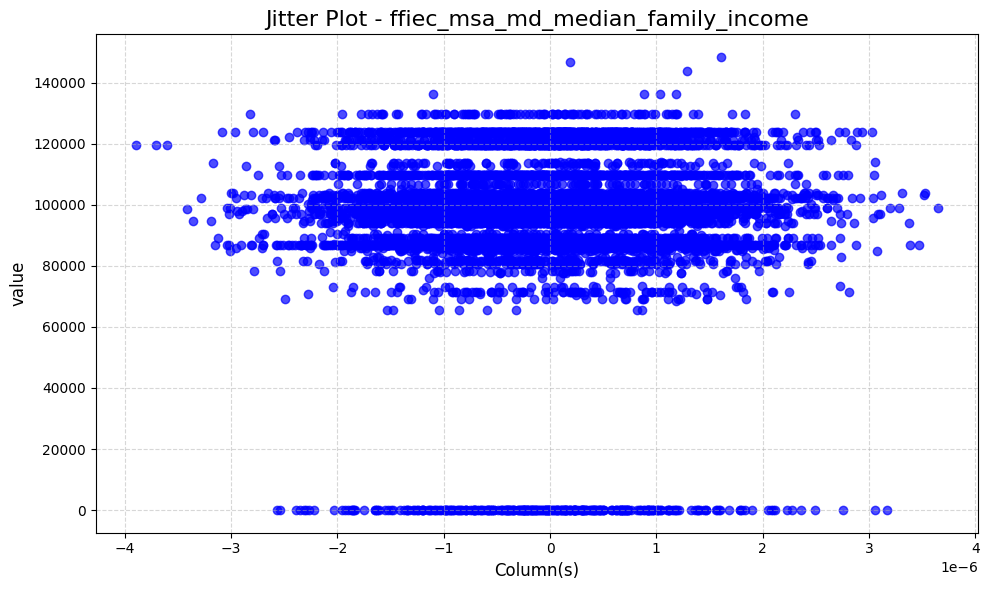

In [ ]:
print(Unique_vals_numeric['ffiec_msa_md_median_family_income']) #this confirms that it is a numeric feature
jitterplot(columns='ffiec_msa_md_median_family_income', data=chunk_peak, jitter=0.000001)


[0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
5        6.0
6        7.0
7        8.0
8        9.0
9       10.0
10    1111.0
dtype: float64, {}, 0]


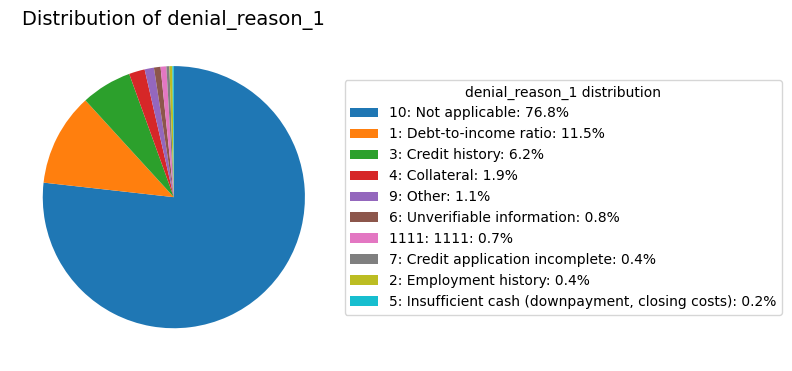

In [50]:
#As we can see, the following is clearly a categorical Feature, where 8888 represents NAN. Copying categories from schema,
print(Unique_vals_numeric['denial_reason_1'])
denial_reason_code = {
    1: "Debt-to-income ratio",
    2: "Employment history",
    3: "Credit history",
    4: "Collateral",
    5: "Insufficient cash (downpayment, closing costs)",
    6: "Unverifiable information",
    7: "Credit application incomplete",
    8: "Mortgage insurance denied",
    9: "Other",
    10: "Not applicable",
    8888: "NaN"  # Special case for NaN values, often used as a placeholder for missing data
}
categorical_to_chart(column_name='denial_reason_1', df=chunk_peak, codemap=denial_reason_code)